<a href="https://colab.research.google.com/github/georgeduranh/ML/blob/main/3_deep_learning/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import boston_housing
from keras import layers, models, optimizers


In [ ]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
train_labels.shape

(404,)

Normalization

In [ ]:
mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_data = train_data  / std

In [ ]:
test_data = test_data - mean
test_data = test_data  / std

In [ ]:
def build_model_regression(lr, input_data):
  model = models.Sequential()
  model.add(layers.Dense(64, activation ='relu', input_shape=input_data))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))

  model.compile(
      optimizer= optimizers.RMSprop(lr=lr),
      loss = 'mse',
      metrics = ['mae']
  )

  return model

In [ ]:
k = 4
num_val_samples = len(train_data)// k
num_epochs = 68
all_histories = [] 

In [ ]:
for i in range(4):
  print('FOLD: ', i)

  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_labels[i*num_val_samples: (i+1)*num_val_samples]

  partial_train_data = np.concatenate([
      train_data[: i*num_val_samples] , 
      train_data[(i+1)*num_val_samples:]
  ], axis = 0)

  partial_train_target = np.concatenate([
      train_labels[: i*num_val_samples] , 
      train_labels[(i+1)*num_val_samples:]
  ], axis = 0)

  model =  build_model_regression (0.001, (13,))
  history = model.fit(partial_train_data, partial_train_target,
                        epochs = num_epochs,
                        batch_size=16,
                        validation_data= (val_data, val_targets),
                        verbose = 0)
  all_histories.append(history.history['val_mae'])

FOLD:  0


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


FOLD:  1
FOLD:  2
FOLD:  3


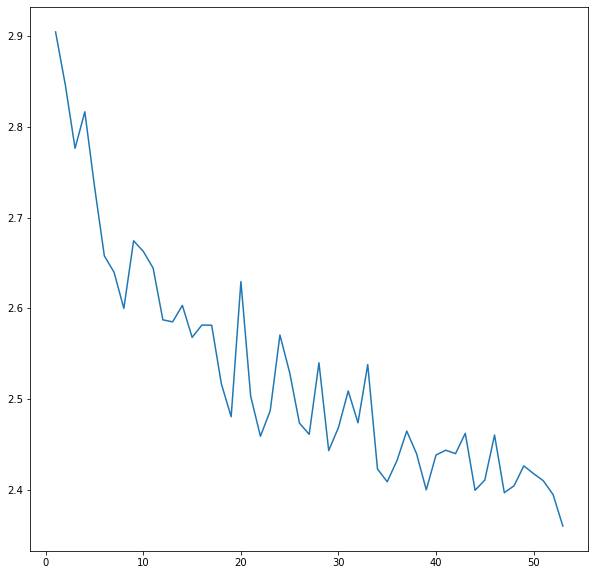

In [ ]:
all_mae_avg = pd.DataFrame(all_histories).mean(axis=0)
#all_mae_avg
fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [ ]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 5041074.0000 - mae: 2187.1179


[5041074.0, 2187.117919921875]

In [ ]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 8023101.5000 - mae: 2749.2034


[8023101.5, 2749.203369140625]